[@misc_chronic_kidney_disease_336]

In [34]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


## Q1. Classification Problem Identification: Define and describe a classification problem based on the dataset.

In [35]:
from ucimlrepo import fetch_ucirepo 
 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  

X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  

print(chronic_kidney_disease.metadata) 
  
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [36]:
print(y)

      class
0       ckd
1       ckd
2       ckd
3       ckd
4       ckd
..      ...
395  notckd
396  notckd
397  notckd
398  notckd
399  notckd

[400 rows x 1 columns]


In [37]:
import pandas as pd

df = pd.concat([X, pd.DataFrame(y, columns=["class"])], axis=1)
df["class"] = df["class"].str.strip()
df["class"] = df["class"].replace({"ckd": 1, "notckd": 0})


df
class_counts = df["class"].value_counts()

print(class_counts)

class
1    250
0    150
Name: count, dtype: int64


 A1:
 Based on the patient's different physiological and laboratory test results, predict whether the individual suffers from chronic kidney disease.

In [38]:
ckd_data = df
ckd_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,0


This dataset contains 400 observations and 25 variables

## 2. Variable Transformation: Implement any transformations chosen or justify the absence of such modifications.

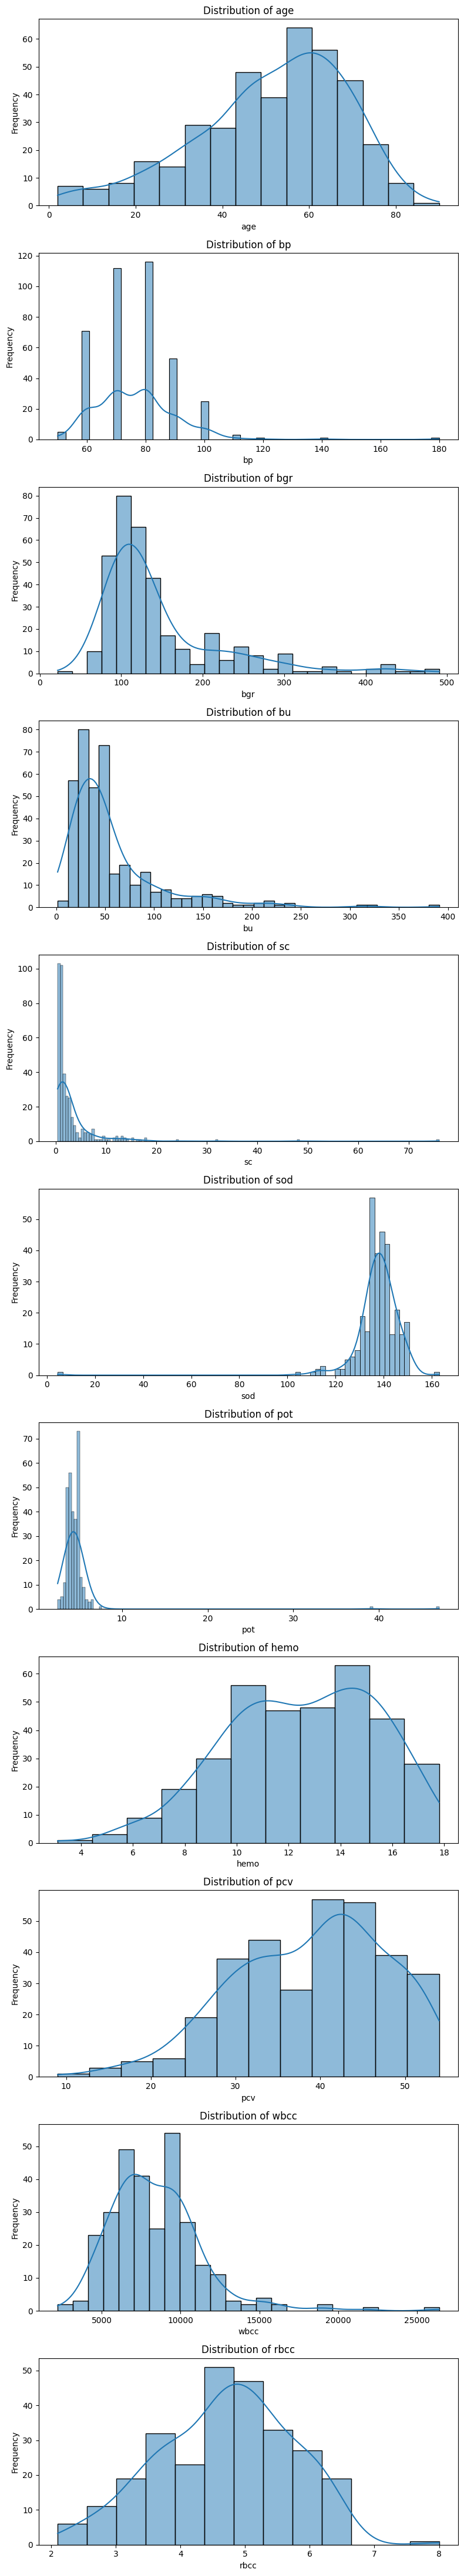

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distributions(data, features):
    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 4 * len(features)))
    if len(features) == 1:
        axes = [axes]  
    
    for ax, feature in zip(axes, features):
        sns.histplot(data[feature], kde=True, ax=ax)
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


numerical_features = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


plot_distributions(ckd_data, numerical_features)



From the graphs, it's evident that variables (bgr, bu, sc, wbcc) exhibit a pronounced right-skewed distribution, which could impact the model's performance. Applying a logarithmic transformation to these variables can mitigate skewness and improve the model's performance.

In [40]:

ckd_data.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class      int64
dtype: object

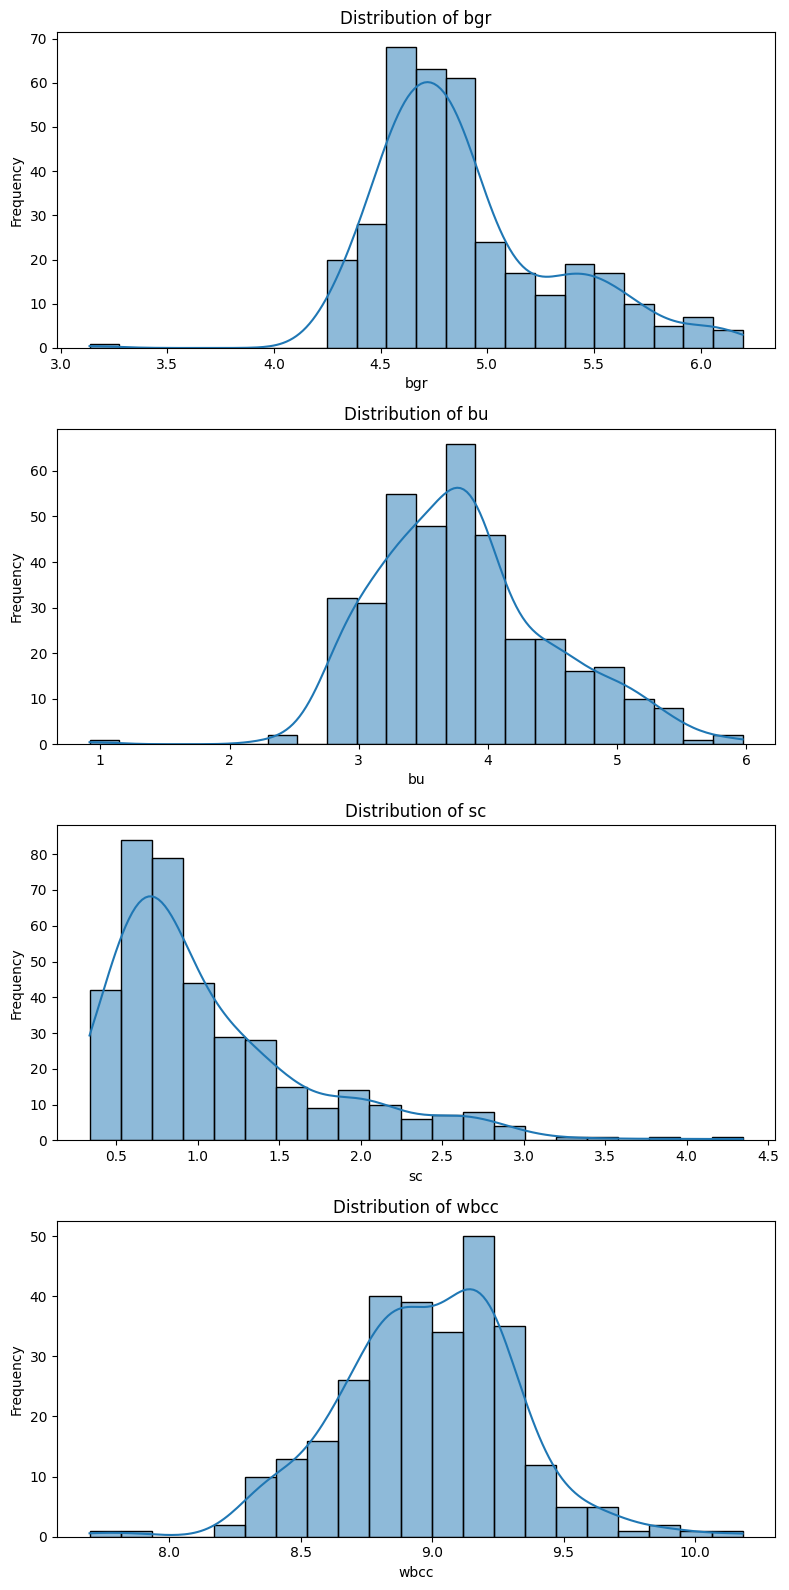

In [41]:
features_to_transform = ['bgr', 'bu', 'sc', 'wbcc']
ckd_data_transformed = ckd_data.copy()

for feature in features_to_transform:
    ckd_data_transformed[feature] = np.log1p(ckd_data[feature])


plot_distributions(ckd_data_transformed, features_to_transform)


Observing that for originally right-skewed variables, applying a logarithmic transformation helps the data approach a more normal distribution.

## 3. Dataset Overview: Provide a detailed description of the dataset, covering variables, sum-maries, observation counts, data types, and distributions (at least three statements).

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class      int64
dtype: object


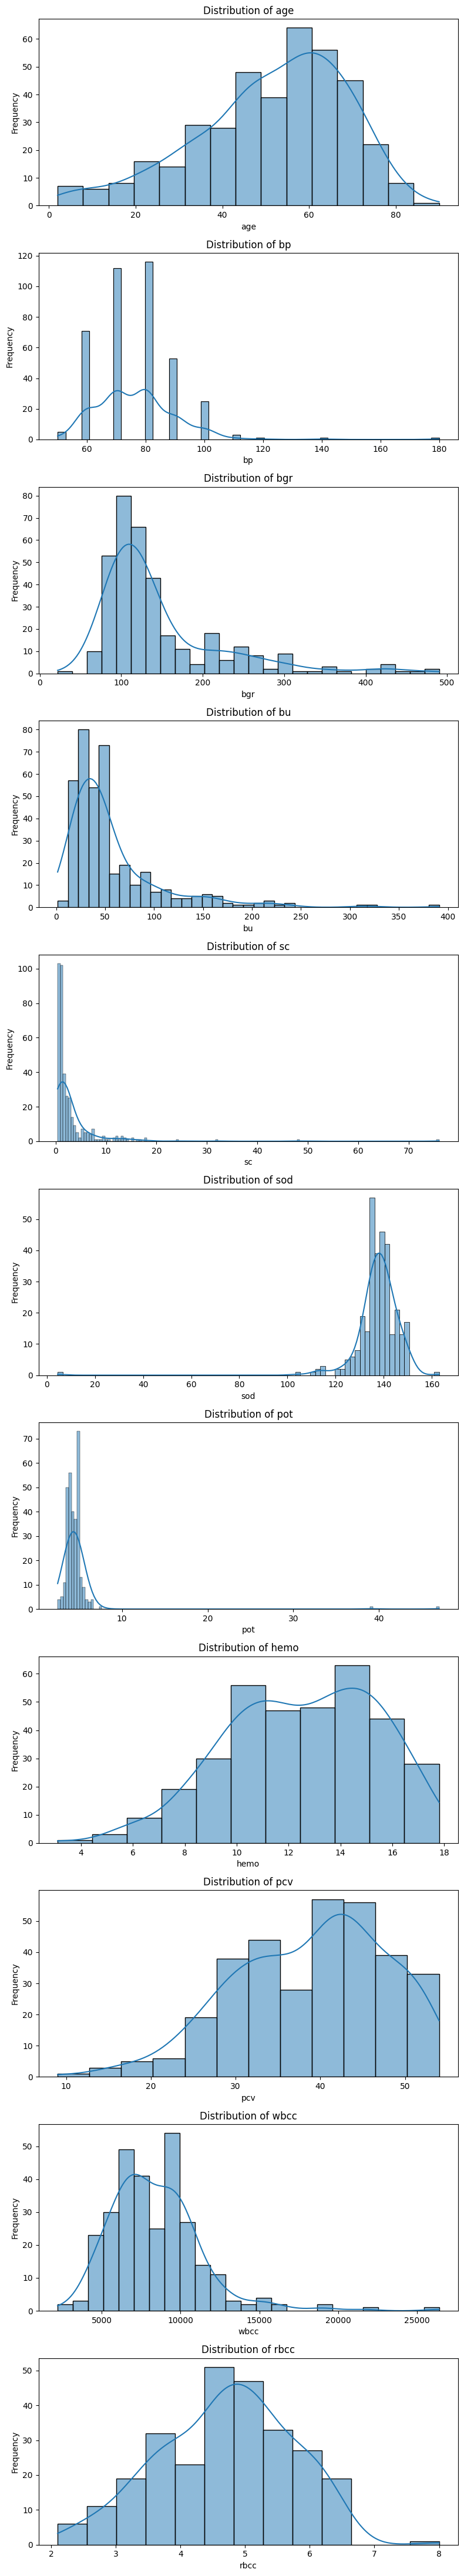

In [42]:

print(ckd_data.dtypes)

plot_distributions(ckd_data, numerical_features)


In [43]:

print("Variables in the dataset:")
print(ckd_data.columns)


print("\nSummary of the dataset:")
print(ckd_data.describe())

observation_count = len(ckd_data)
print("\nObservation count in the dataset:", observation_count)


print("\nData types of each variable in the dataset:")
print(ckd_data.dtypes)




Variables in the dataset:
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

Summary of the dataset:
              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

   

Variable Summary:
The dataset comprises 25 variables, categorized into numerical and categorical variables. Below are descriptions of some key variables:

Age (age): Floating-point number representing the patient's age.
Blood Pressure (bp): Floating-point number recording the patient's blood pressure value.
Specific Gravity (sg): Floating-point number indicating the specific gravity of urine, an important indicator for diagnosing kidney diseases.
Albumin (al): Floating-point number representing the content of albumin in urine, reflecting kidney filtration function.
Sugar (su): Floating-point number indicating the sugar content in urine.
Red Blood Cell Count (rbc): Categorical variable describing the status of red blood cells.
Pus Cell (pc): Categorical variable describing the appearance of kidney cells.
White Blood Cell Count (wbcc): Floating-point number indicating the quantity of white blood cells in the blood.
Red Blood Cell Count (rbcc): Floating-point number indicating the quantity of red blood cells in the blood.
Kidney Function (htn, dm, cad): Categorical variables indicating the presence or absence of hypertension, diabetes mellitus, and coronary artery disease.

Observation Count:
The dataset contains 400 observation records. Each record corresponds to a series of tests and observations for a patient.

Data Types:
Numerical Variables: Primarily used for recording quantitative data such as age, blood pressure, and various biochemical indicators.
Categorical Variables: Used for recording qualitative data such as the presence of certain disease states or abnormalities in red blood cells.

Distribution:
Numerical variables exhibit varying degrees of skewness. Some, such as blood glucose (bgr) and blood urea (bu), demonstrate significant right-skewed distributions, possibly due to outliers or inherent data imbalance.

## 4. Association Between Variables: Analyze variable relationships and their implications for feature selection or extraction (at least three statements).


Perform the following three analyses:
1. Computing Correlation Coefficients for Numerical Variables
   This analysis can help understand which variables are strongly correlated with each other.

2. Analyzing the Relationship between Categorical Variables and Numerical Variables
   Examining the relationship between patients with hypertension (htn) and blood pressure (bp), and how this relationship impacts the prediction of CKD.

3. Association between Blood Pressure (bp) and Hemoglobin (hemo)
   The correlation between blood pressure and hemoglobin may reveal the impact of renal insufficiency on the overall health status of patients. Hemoglobin levels typically reflect the health of red blood cells, and renal insufficiency may lead to anemia, thereby affecting hemoglobin levels.

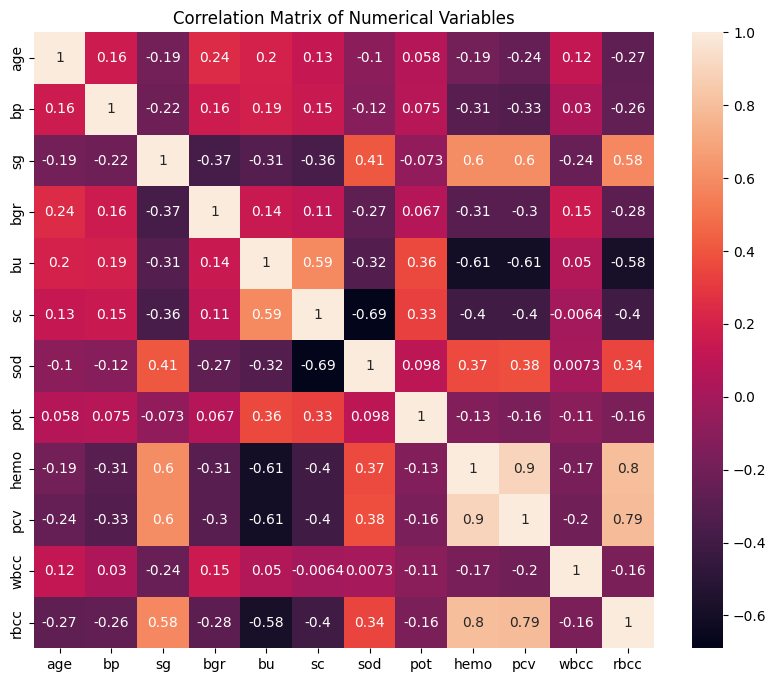

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_vars = ['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo' , 'pcv','wbcc', 'rbcc']

correlation_matrix = ckd_data[numerical_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

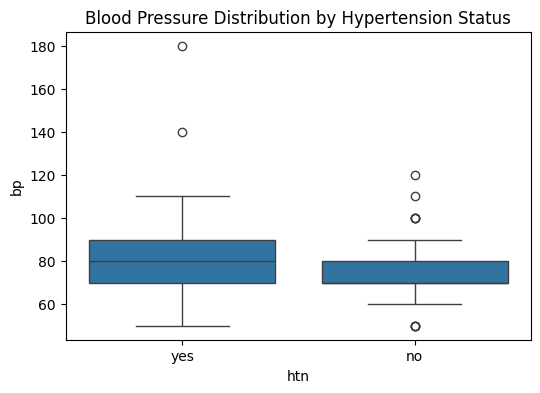

In [45]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='htn', y='bp', data=ckd_data)
plt.title('Blood Pressure Distribution by Hypertension Status')
plt.show()


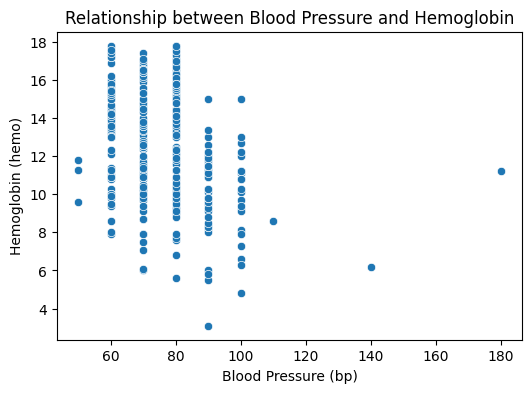

In [46]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bp', y='hemo', data=ckd_data)
plt.title('Relationship between Blood Pressure and Hemoglobin')
plt.xlabel('Blood Pressure (bp)')
plt.ylabel('Hemoglobin (hemo)')
plt.show()


Analysis Results
1. Correlation of Numerical Variables
   From the correlation matrix, we observe several significant correlations: 
   Hemoglobin (hemo) is highly correlated with packed cell volume (pcv) (0.90), indicating that these two features provide similar information. For subsequent model analysis, selecting either one is sufficient.
   Serum creatinine (sc) and blood urea (bu) also show a relatively high correlation (0.58). In the assessment of renal function, these two biochemical indicators may overlap in information. 
   Specific gravity (sg) is negatively correlated with albumin (al) (-0.47). As specific gravity increases, the content of albumin in urine tends to decrease, which is clinically meaningful because higher specific gravity typically indicates good renal concentration function.



2. Relationship between Categorical Variables and Numerical Variables
The boxplot of blood pressure concerning hypertension status shows that patients with hypertension (htn) typically have higher blood pressure readings. This aligns with expectations, indicating that both blood pressure and hypertension status are important features in predicting CKD.

3. From the scatter plot, it's evident that there is no apparent linear relationship between blood pressure (bp) and hemoglobin (hemo). Despite both being important health indicators, they exhibit independent variations among chronic kidney disease (CKD) patients, reflecting different physiological processes. Due to the lack of significant correlation between blood pressure and hemoglobin, they can be included as independent features in the model, each providing distinct information, thus enhancing the predictive capability of the model.

Potential Implications for Feature Selection
Based on these findings, it's advisable to consider removing some highly correlated variables during feature selection to avoid multicollinearity, opting to include only either hemoglobin (hemo) or packed cell volume (pcv).

Both categorical variables and associated numerical variables can provide strong predictive information and should be included in any model used for predicting CKD.

## 5. Missing Value Analysis and Handling: Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [47]:
missing_values = ckd_data.isnull().sum()
missing_percentage = (missing_values / len(ckd_data)) * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
missing_data[missing_data['Missing Count'] > 0].sort_values(by='Percentage', ascending=False)


,Missing Count,Percentage
rbc,152,38.00
rbcc,131,32.75
wbcc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


Missing Value Analysis:
Several variables have a high proportion of missing values:
- Red Blood Cell Count (rbc) is missing 38%.
- Red Blood Cell Count (rbcc) is missing 32.75%.
- White Blood Cell Count (wbcc) is missing 26.5%.
- The "target" column is entirely missing. This column is used to record the target variable or outcome that the model aims to predict.

Handling Strategy:

Delete Variables:
The "target" column is entirely missing, which is used to record the target variable or outcome that the model aims to predict. This column will be retained for writing the final prediction results.

Fill Missing Values:

For rbc, rbcc, and wbcc, which are crucial medical indicators, missing values in numerical variables will be filled with the median, while missing values in categorical variables will be filled with the mode.

For other numerical variables such as sod, pot, pcv, hemo, su, sg, al, bgr, bu, and sc, missing values will be filled with the median because the median is more robust to outliers.

For categorical variables like htn, dm, cad, etc., which have fewer missing values, they will be directly filled with the mode.

In [48]:
ckd_data_cleaned = ckd_data
numerical_cols = ckd_data_cleaned.select_dtypes(include=['float64']).columns
ckd_data_cleaned[numerical_cols] = ckd_data_cleaned[numerical_cols].fillna(ckd_data_cleaned[numerical_cols].median())
categorical_cols = ckd_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = ckd_data_cleaned[col].mode()[0]
    ckd_data_cleaned[col] = ckd_data_cleaned[col].fillna(mode_value)

ckd_data_cleaned.isnull().sum().max()


0

In [49]:
ckd_data_cleaned

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,0


## 6. Outlier Analysis: Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

Outlier analysis and handling strategies-Identification of outliers: The IQR (interquartile range) method is used to detect outliers in numerical variables.This method can identify the data point from the group, these data points in the first quartile and the third quartile of more than 1.5 times the IQR are much less distance.
- Handling outliers:
No treatment: If the outliers are considered to be part of natural variation or have little impact on the predictions of the model, the choice is made not to treat the outliers.

In [50]:
def detect_outliers(data, features):
    outlier_indices = []
    
    for feature in features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
       
        outlier_list_col = data[(data[feature] < Q1 - outlier_step) | (data[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = list(set(outlier_indices))
    return outlier_indices


outlier_indices = detect_outliers(ckd_data_cleaned, numerical_cols)

outliers_data = ckd_data_cleaned.loc[outlier_indices]
outliers_data.describe(include='all')


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,194.000000,194.000000,194.000000,194.000000,194.000000,194,194,194,194,194.000000,...,194.000000,194.000000,194.000000,194,194,194,194,194,194,194.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,...,NaN,NaN,NaN,2,3,2,2,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,yes,yes,no,good,no,no,NaN
freq,NaN,NaN,NaN,NaN,NaN,158,137,160,176,NaN,...,NaN,NaN,NaN,109,105,164,132,144,145,NaN
mean,53.376289,80.515464,1.015902,1.381443,0.814433,NaN,NaN,NaN,NaN,177.298969,...,35.494845,8802.577320,4.550515,NaN,NaN,NaN,NaN,NaN,NaN,0.850515
std,17.122166,15.860214,0.005490,1.481795,1.375808,NaN,NaN,NaN,NaN,95.288834,...,8.486654,3110.577568,1.064707,NaN,NaN,NaN,NaN,NaN,NaN,0.357488
min,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,46.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,110.250000,...,29.000000,7225.000000,3.800000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,56.000000,80.000000,1.015000,1.000000,0.000000,NaN,NaN,NaN,NaN,135.000000,...,37.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,65.000000,90.000000,1.020000,3.000000,1.000000,NaN,NaN,NaN,NaN,232.250000,...,40.000000,9800.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Outlier Analysis Results
The outlier detection reveals multiple outliers among 194 observations.

Outliers are present in multiple variables:

Blood Pressure (bp): The highest value is 180 mmHg.
Hemoglobin (hemo): The lowest value is 3.1 g/dL.
White Blood Cell Count (wbcc): The highest value is 26400 cells/mm³.
Urinary Sugar (su) and Urinary Albumin (al): The highest values are 5, which may indicate clinically significant health conditions.

In [51]:
ckd_data_cleaned[['bp', 'hemo', 'wbcc']].describe()


,bp,hemo,wbcc
count,400.000000,400.00000,400.000000
mean,76.575000,12.54250,8298.500000
std,13.489785,2.71649,2529.593814
min,50.000000,3.10000,2200.000000
25%,70.000000,10.87500,6975.000000
50%,80.000000,12.65000,8000.000000
75%,80.000000,14.62500,9400.000000
max,180.000000,17.80000,26400.000000


## 7. Sub-group Analysis: Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

Performing sub-group analysis for question 7, exploring potential sub-groups in the data using clustering methods.

c:\ProgramData\anaconda3\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.23936949874189264


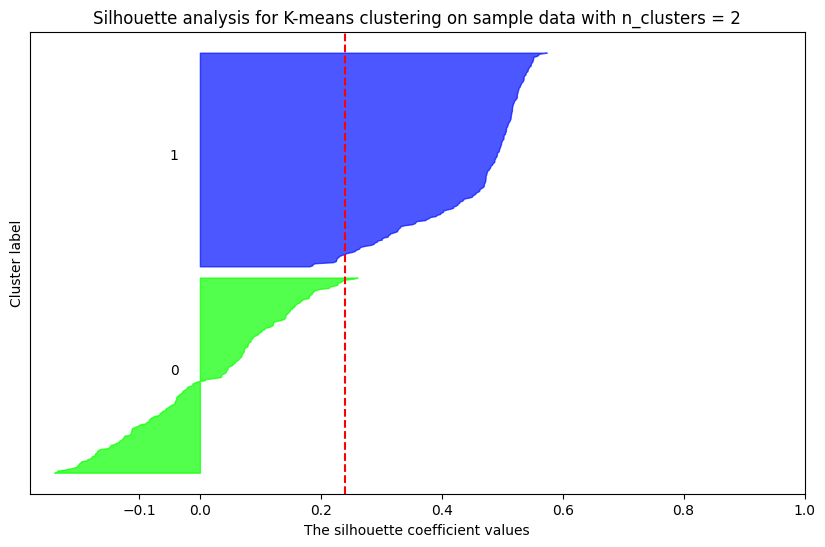

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

clustering_data = ckd_data_cleaned[numerical_cols].copy()

scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_scaled)
silhouette_avg = silhouette_score(clustering_scaled, cluster_labels)

print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

sample_silhouette_values = silhouette_samples(clustering_scaled, cluster_labels)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = sns.color_palette("hsv", n_clusters)[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

   
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  

plt.title('Silhouette analysis for K-means clustering on sample data with n_clusters = 2')
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([]) 
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


This figure shows that in the case of n_clusters = 2, the contour coefficients of most sample points are above 0.6, and the clustering effect is good, but some sample points have poor clustering effect.

c:\ProgramData\anaconda3\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


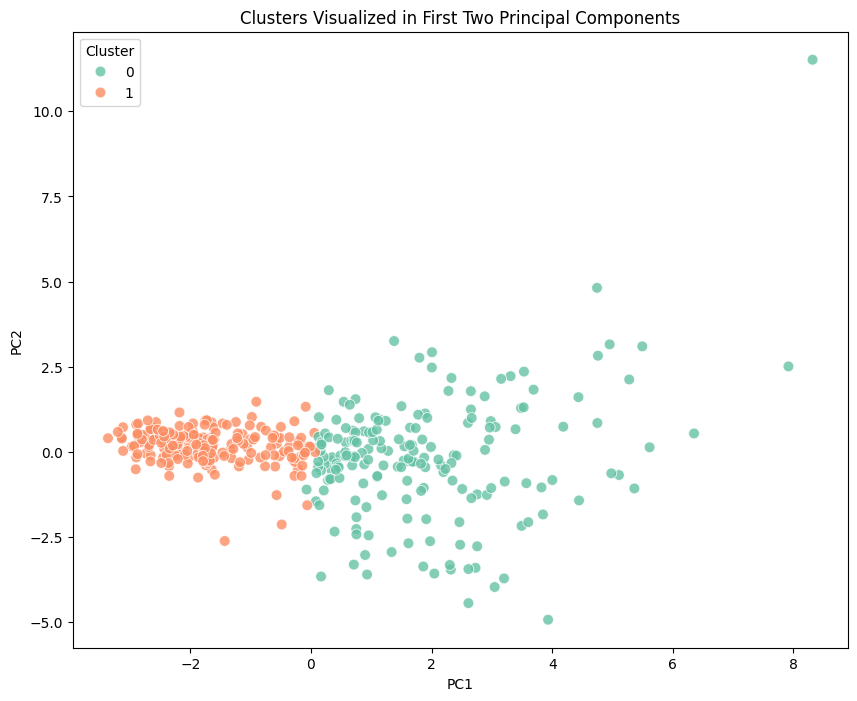

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
clustering_data = ckd_data_cleaned[numerical_cols].copy()
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_scaled)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', s=60, alpha=0.8)
plt.title('Clusters Visualized in First Two Principal Components')
plt.show()


In [54]:
ckd_data_cleaned['Cluster'] = cluster_labels

print(ckd_data_cleaned.head())



    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...    wbcc  rbcc  htn   dm  cad  appet   pe  ane class Cluster  
0  121.0  ...  7800.0   5.2  yes  yes   no   good   no   no     1       1  
1  121.0  ...  6000.0   4.8   no   no   no   good   no   no     1       1  
2  423.0  ...  7500.0   4.8   no  yes   no   poor   no  yes     1       0  
3  117.0  ...  6700.0   3.9  yes   no   no   poor  yes  yes     1       0  
4  106.0  ...  7300.0   4.6   no   no   no   good   no   no     1       0  

[5 rows x 26 columns]


In [55]:
ckd_data_cleaned

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,Cluster
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,7800.0,5.2,yes,yes,no,good,no,no,1,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,6000.0,4.8,no,no,no,good,no,no,1,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500.0,4.8,no,yes,no,poor,no,yes,1,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,1,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300.0,4.6,no,no,no,good,no,no,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,6700.0,4.9,no,no,no,good,no,no,0,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,7800.0,6.2,no,no,no,good,no,no,0,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,6600.0,5.4,no,no,no,good,no,no,0,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,7200.0,5.9,no,no,no,good,no,no,0,1


## 8. Data Splitting: Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [56]:
from sklearn.model_selection import train_test_split

X = ckd_data_cleaned.drop('class', axis=1) 
y = ckd_data_cleaned['class']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training set shape: (280, 25)
Testing set shape: (120, 25)
Training labels shape: (280,)
Testing labels shape: (120,)


In [57]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,Cluster
39,82.0,80.0,1.010,2.0,2.0,normal,normal,notpresent,notpresent,140.0,...,40.0,9800.0,4.2,yes,yes,no,good,no,no,0
167,34.0,70.0,1.020,0.0,0.0,abnormal,normal,notpresent,notpresent,139.0,...,42.0,2200.0,4.8,no,no,no,poor,no,no,1
383,80.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,119.0,...,49.0,5100.0,5.0,no,no,no,good,no,no,1
221,66.0,70.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,248.0,...,40.0,8000.0,4.8,yes,yes,no,good,no,no,1
351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,83.0,...,40.0,9900.0,4.7,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,34.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,121.0,...,52.0,9200.0,6.3,no,no,no,good,no,no,1
72,64.0,90.0,1.010,3.0,3.0,normal,abnormal,present,notpresent,121.0,...,40.0,8000.0,4.8,yes,yes,no,good,yes,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
235,45.0,70.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,113.0,...,26.0,5700.0,4.8,no,no,yes,good,no,yes,0


## 9. Classifier Choices: Identify the two classifiers you have chosen and justify your selections.


To address the classification problem of Chronic Kidney Disease (CKD), two different types of classifiers are selected:

- Dicision tree:

Decision tree makes prediction by building a tree model, each node is a judgment condition, so that the data is divided into different branches, and finally the prediction results are given on the leaf nodes.It can handle high dimensional data and has good resistance to outliers and overfitting.

- Logistic Regression:

Logistic Regression is a regression analysis method that is used for predicting the outcome of a categorical dependent variable based on one or more predictor variables. It calculates the probability of the presence of a particular outcome. It's simple and intuitive, requiring no complex training process. Logistic Regression is suitable for medical datasets as it can adapt to nonlinear patterns in the data.

## 10. Performance Metrics: Outline the two metrics for comparing the performance of the classifiers.

To evaluate and compare the performance of the classifiers mentioned above, we will use the following two performance metrics:

- Accuracy:

Accuracy is the ratio of correctly classified samples to the total number of samples. This is the most straightforward performance measure.

- F1 Score:

The F1 score is the harmonic mean of precision and recall, commonly used as a performance metric on imbalanced datasets. It considers both the precision (the proportion of predicted positive samples that are actually positive) and recall (the proportion of actual positive samples that are correctly predicted as positive).

In [58]:
y_train

39     1
167    1
383    0
221    1
351    0
      ..
255    0
72     1
396    0
235    1
37     1
Name: class, Length: 280, dtype: int64

## 11. Feature Selection/Extraction: Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
## 12. Classifier Comparison: Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = [col for col in categorical_cols if col in X_train.columns]


for col in categorical_cols:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()



preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')


X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

columns_transformed = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(columns_transformed) + list(X_train.select_dtypes(exclude=['object']).columns)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=all_columns)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=all_columns)


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

dt_encoded = DecisionTreeClassifier(random_state=1)
dt_encoded.fit(X_train_encoded, y_train)


importances_encoded = dt_encoded.feature_importances_
important_indices_encoded = np.argsort(importances_encoded)[::-1][:10]  
X_train_important_encoded = X_train_encoded.iloc[:, important_indices_encoded]
X_test_important_encoded = X_test_encoded.iloc[:, important_indices_encoded]

dt_important_encoded = DecisionTreeClassifier(random_state=1)
dt_important_encoded.fit(X_train_important_encoded, y_train)

log_reg_encoded = LogisticRegression(max_iter=100000, solver='saga')
log_reg_encoded.fit(X_train_important_encoded, y_train)

dt_predictions_encoded = dt_important_encoded.predict(X_test_important_encoded)
log_reg_predictions_encoded = log_reg_encoded.predict(X_test_important_encoded)

dt_accuracy_encoded = accuracy_score(y_test, dt_predictions_encoded)
dt_f1_encoded = f1_score(y_test, dt_predictions_encoded)
log_reg_accuracy_encoded = accuracy_score(y_test, log_reg_predictions_encoded)
log_reg_f1_encoded = f1_score(y_test, log_reg_predictions_encoded)

print("Decision Tree Classifier with encoded and selected features:")
print(f"Accuracy: {dt_accuracy_encoded}")
print(f"F1 Score: {dt_f1_encoded}")

print("\nLogistic Regression Classifier with encoded and selected features:")
print(f"Accuracy: {log_reg_accuracy_encoded}")
print(f"F1 Score: {log_reg_f1_encoded}")

Decision Tree Classifier with encoded and selected features:
Accuracy: 0.975
F1 Score: 0.9787234042553192

Logistic Regression Classifier with encoded and selected features:
Accuracy: 0.9333333333333333
F1 Score: 0.9393939393939393


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.97      0.99      0.98        70

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120


Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.89      0.94        70

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



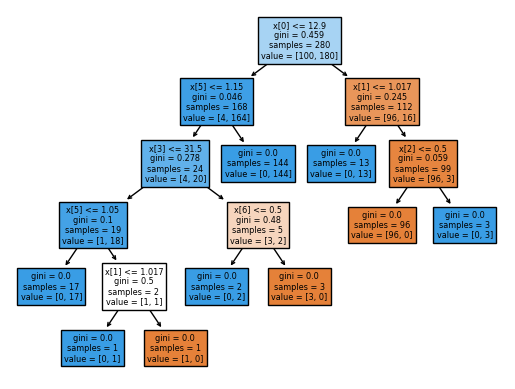

In [61]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

dt_classification_report = classification_report(y_test, dt_predictions_encoded)
print("Decision Tree Classifier Classification Report:")
print(dt_classification_report)

log_reg_classification_report = classification_report(y_test, log_reg_predictions_encoded)
print("\nLogistic Regression Classifier Classification Report:")
print(log_reg_classification_report)

plot_tree(dt_important_encoded, filled=True)
plt.show()


 -Q11：Feature Selection/Extraction Selected Features: 'hemo', 'pev', 'rbec', 'ane no', 'bu'ane yes', 'pot', 'sc', 'bgr', 'sod' By retraining the decision tree model and selecting the most important features, we achieved optimization of the model.

Q12: Classifier Comparison Decision Tree Classifier: After feature selection optimization, the decision tree demonstrated high accuracy and F1 scores on the test set. It effectively captured patterns in the data and exhibited robustness to noise and outliers. Logistic Regression Classifier: Despite undergoing the same feature selection process, logistic regression performed poorly due to its high sensitivity to the relative distances between features.

## 13. Interpretable Classifier Insight: After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
## 14. [Bonus] Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

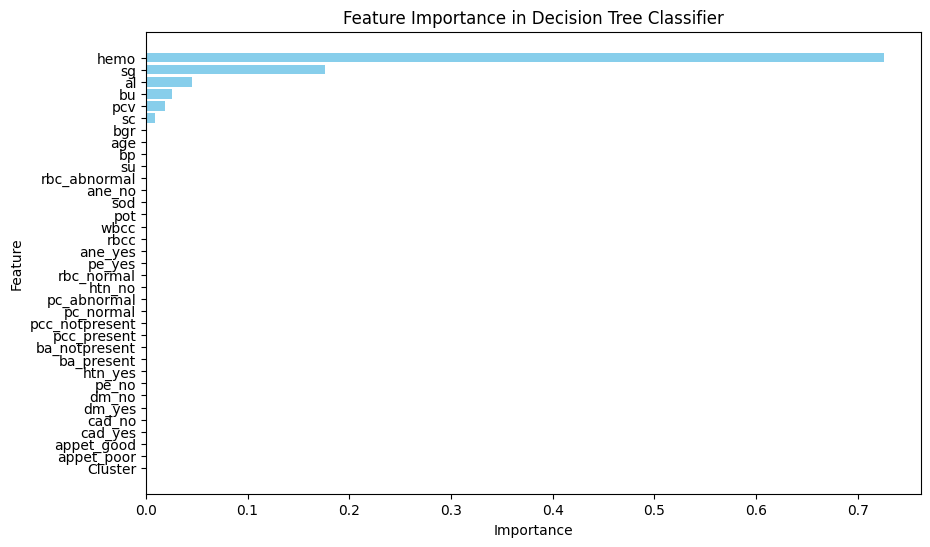

In [62]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train_encoded, y_train)

feature_importances = dt_model.feature_importances_

feature_names = X_train_encoded.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()


Q13:
In this task, the decision tree model was chosen as the interpretable classifier. It not only demonstrates high accuracy and good predictive capability but also helps us understand which variables are crucial for predicting Chronic Kidney Disease (CKD).

In the decision tree model, hemoglobin (hemo) and packed cell volume (pcv) exhibit high feature importance scores, indicating their significance in early CKD diagnosis. A decrease in hemoglobin levels may indicate the presence of anemia, a common complication among CKD patients.

In [63]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

for col in categorical_cols:
    ckd_data_cleaned[col] = ckd_data_cleaned[col].str.strip()
    ckd_data_cleaned[col] = ckd_data_cleaned[col].replace({'\tno': 'no', '\tyes': 'yes'})

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X = ckd_data_cleaned.drop(['class', 'Cluster'], axis=1)
y = ckd_data_cleaned['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

log_reg_model = LogisticRegression(max_iter=100000, solver='saga')
log_reg_model.fit(X_train_preprocessed, y_train)

predictions = log_reg_model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

print("\nLogistic Regression Classifier with encoded and selected features:")
print(f"Accuracy: {log_reg_accuracy_encoded}")
print(f"F1 Score: {log_reg_f1_encoded}")

Accuracy: 0.9833333333333333
F1 Score: 0.9855072463768115

Logistic Regression Classifier with encoded and selected features:
Accuracy: 0.9333333333333333
F1 Score: 0.9393939393939393


In [64]:
from sklearn.metrics import classification_report

log_reg_classification_report = classification_report(y_test, predictions)
print("\nLogistic Regression Classifier Classification Report:")
print(log_reg_classification_report)



Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.97      0.99        70

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [65]:
log_reg_classification_report = classification_report(y_test, log_reg_predictions_encoded)
print("\nLogistic Regression Classifier Classification Report:")
print(log_reg_classification_report)



Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.89      0.94        70

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [66]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[50  0]
 [ 2 68]]


Q14
In the comparison, it was observed that the performance of the logistic regression classifier was significantly improved by feature selection and extraction methods. The new logistic regression classifier exhibited higher accuracy and F1 score on the test set, reaching 0.983 and 0.986 respectively. In contrast, after optimizing the previous logistic regression classifier with the same feature selection and extraction methods, the accuracy and F1 score were 0.933 and 0.939 respectively.
In the confusion matrix, it can also be observed that the optimized logistic regression classifier had only 2 misclassifications, whereas the previous classifier had 6 misclassifications.
Conclusion: Optimizing the logistic regression classifier through feature selection and extraction methods can enhance its performance.

16. **Link** to the public GitHub repository.

https://github.com/zhany988/assign-6-project.git



\newpage

## Reference 